### 8️⃣ Kaggle Project : Bike Demand

#### Data Fields
```
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).   
The RMSLE is calculated as

$\sqrt{\frac{1}{n} \sum_{i=1}^n (log(p_{i}+1) − log(a_{i}+1))^2}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data 불러오기

In [2]:
test_df = pd.read_csv('./data/test.csv', parse_dates = ['datetime'])
train_df = pd.read_csv('./data/train.csv', parse_dates = ['datetime'])

In [3]:
all_df = pd.concat((train_df, test_df), axis = 0).reset_index()
all_df.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [4]:
all_df.tail()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17378,6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [5]:
len(train_df)

10886

In [6]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df), len(all_df)))
train_index[0],  test_index[0]

(0, 10886)

### 결측치 확인

In [7]:
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

### Evaluation Metrics

$\sqrt{\frac{1}{n} \sum_{i=1}^n (log(p_{i}+1) − log(a_{i}+1))^2}$

- $log$안의 값은 0이 될 수 없다.  
$\Rightarrow$ np.nan_to_num : Nan값이 나오지 않도록 해줌

    - np.nan일 경우 매우 작은 값을 할당해줌
    - np.inf일 경우 매우 큰 값을 할당해줌

In [8]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [9]:
submission_df = pd.read_csv('./data/sampleSubmission.csv')
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [10]:
rmsle(submission_df['count'].values, 
        np.random.randint(0, 100, size = len(submission_df)))

3.772681619734997

### 필요없는 Column 삭제

In [11]:
del all_df['casual']
del all_df['registered']
del all_df['index']

### Category Data One-Hot Encoding

In [12]:
pre_df = all_df.merge(pd.get_dummies(all_df['season'], prefix = 'season'),
                                     left_index = True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0


In [13]:
pre_df = pre_df.merge(pd.get_dummies(all_df['weather'], prefix = 'weather'),
                                     left_index = True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0,1,0,0,0


### Datetime 나누기

In [14]:
pre_df['datetime'].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
pre_df['year'] = pre_df['datetime'].dt.year
pre_df['month'] = pre_df['datetime'].dt.month
pre_df['day'] = pre_df['datetime'].dt.day
pre_df['hour'] = pre_df['datetime'].dt.hour
pre_df['weekday'] = pre_df['datetime'].dt.weekday

#### weekday 또한 Categorical Data
$\Rightarrow$ get_dummies

In [16]:
pre_df['weekday'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

In [17]:
pre_df = pre_df.merge(pd.get_dummies(pre_df['weekday'], prefix='weekday'),
                                     left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,...,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,...,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,...,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,...,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,...,1,4,5,0,0,0,0,0,1,0


In [18]:
pre_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

season, weather 등등 숫자로 보고 있음  
$\Rightarrow$ category type으로 변경

In [19]:
category_variable_list = ['season', 'weather','workingday','season_1','season_2','season_3',
        'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4','weekday','weekday_0',
        'weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6',
        'year','month','day','hour']

for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype('category')

In [20]:
pre_df.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [21]:
train_df = pre_df.iloc[train_index]
train_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336.0,...,19,19,2,0,0,1,0,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241.0,...,19,20,2,0,0,1,0,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168.0,...,19,21,2,0,0,1,0,0,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129.0,...,19,22,2,0,0,1,0,0,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,88.0,...,19,23,2,0,0,1,0,0,0,0


#### Count와 다른 Column과의 관계

In [22]:
import warnings
warnings.filterwarnings(action='ignore')

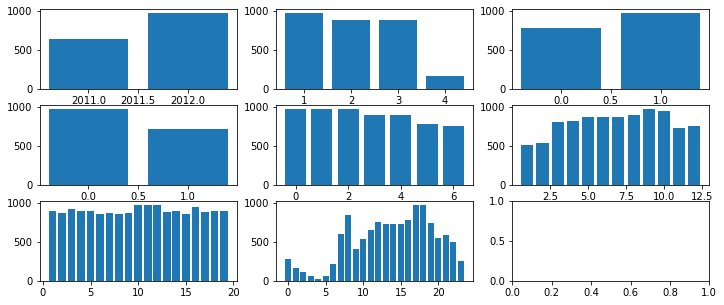

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(12,5)

axes[0][0].bar(train_df['year'], train_df['count'])
axes[0][1].bar(train_df['weather'], train_df['count'])
axes[0][2].bar(train_df['workingday'], train_df['count'])
axes[1][0].bar(train_df['holiday'], train_df['count'])
axes[1][1].bar(train_df['weekday'], train_df['count'])
axes[1][2].bar(train_df['month'], train_df['count'])
axes[2][0].bar(train_df['day'], train_df['count'])
axes[2][1].bar(train_df['hour'], train_df['count'])

plt.show()

In [24]:
series_data = train_df.groupby(['year','month'])['count'].mean()
series_data.index.tolist()[:5]

[(2011, 1), (2011, 2), (2011, 3), (2011, 4), (2011, 5)]

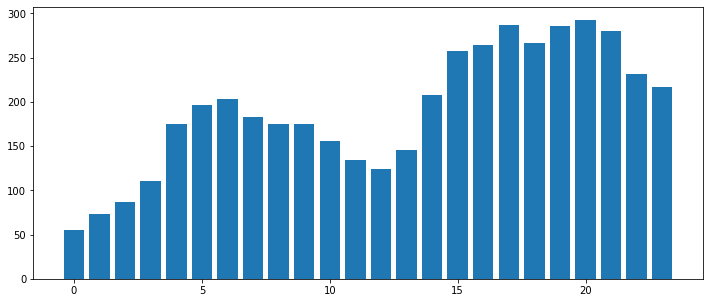

In [25]:
fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12,5)
plt.show()

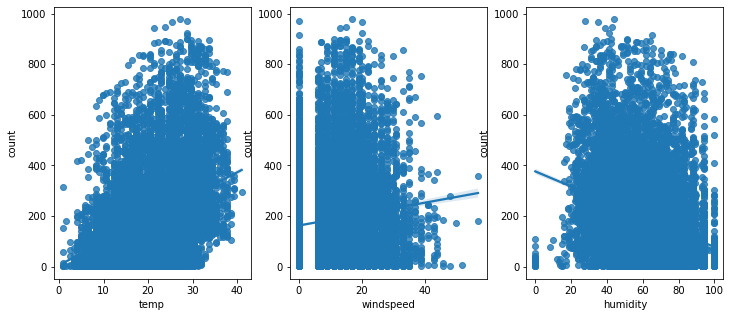

In [26]:
import seaborn as sn

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sn.regplot(x = 'temp', y = 'count', data = train_df, ax =ax1)
sn.regplot(x = 'windspeed', y = 'count', data = train_df, ax =ax2)
sn.regplot(x = 'humidity', y = 'count', data = train_df, ax =ax3)
plt.show()

In [27]:
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'year',
 'month',
 'day',
 'hour']

#### 데이터간의 상관관계

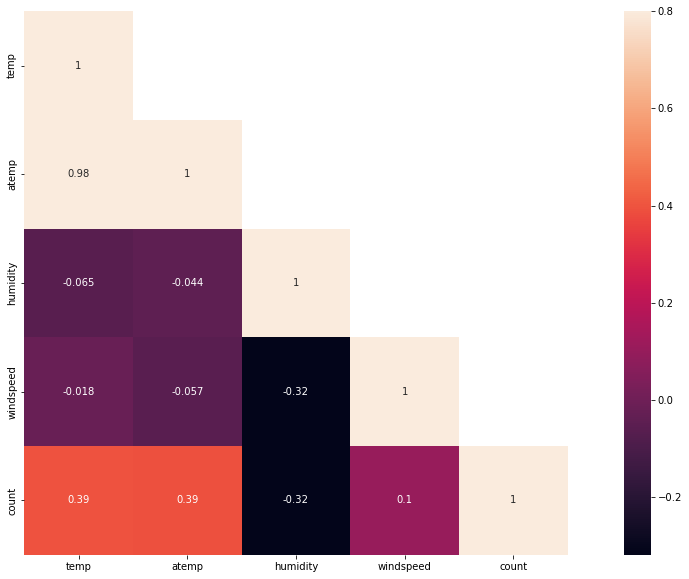

In [28]:
corrMatt = train_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask = mask, vmax = 0.8, square = True, annot = True)
plt.show()

상관관계가 1에 가까운 데이터는 빼는 게 좋음

#### 변수 정리

In [29]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [30]:
continuous_variable_list = ['temp','humidity','windspeed','atemp']

In [31]:
season_list = ['season_1','season_2','season_3','season_4']
weather_list = ['weather_1','weather_2','weather_3','weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

In [32]:
category_variable_list = ['season','holiday','workingday','weather','weekday','month','year','hour']

In [33]:
all_variable_list = continuous_variable_list + category_variable_list

In [34]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)

In [35]:
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [36]:
number_of_variable = len(all_variable_list)
number_of_variable

15

### 변수 조합 보기

In [37]:
variable_combinations = []

import itertools

# 변수 최소 개수 8개, 최대 : 전체
for L in range(8, number_of_variable+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset : 
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        variable_combinations.append(temp)

- 모든 경우의 수

In [38]:
len(variable_combinations)

16384

In [39]:
variable_combinations[0]

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather']

근데 이렇게는 잘 안함!  
RFE, FS 사용

#### 예측할 변수 삭제

In [40]:
del pre_df['count']

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

In [42]:
kf =KFold(n_splits=10)

y = train_df['count'].values
final_output = []
models = []

print(len(variable_combinations))
ts = datetime.datetime.now()

for i, combination in enumerate(variable_combinations):

    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()

    lr_result = []
    ridge_result = []
    lasso_result = []

    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]

    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index] 

        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)

        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)

    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    models.append([lr, ridge, lasso])
    
    # 100번 돌때마다 시간이 얼마나 걸리는지 
    if i% 100 == 0:
        # 현재 시간 저장
        tf = datetime.datetime.now()
        te = tf - ts
        print(i, te)
        ts = datetime.datetime.now()

16384
0 0:00:00.083462
100 0:00:10.161041
200 0:00:11.254784
300 0:00:11.304796
400 0:00:07.706630
500 0:00:06.293212
600 0:00:06.084741
700 0:00:05.721716
800 0:00:06.770910
900 0:00:10.227425
1000 0:00:12.471240
1100 0:00:10.930251
1200 0:00:12.749912
1300 0:00:10.310429
1400 0:00:07.044164
1500 0:00:08.361122
1600 0:00:06.173719
1700 0:00:07.065108
1800 0:00:11.903171
1900 0:00:13.537798
2000 0:00:13.161940
2100 0:00:13.987663
2200 0:00:13.571716
2300 0:00:10.468319
2400 0:00:10.752523
2500 0:00:10.207714
2600 0:00:10.479033
2700 0:00:10.268358
2800 0:00:11.587017
2900 0:00:11.931093
3000 0:00:11.104059
3100 0:00:11.704171
3200 0:00:09.894568
3300 0:00:11.296091
3400 0:00:10.317426
3500 0:00:06.793834
3600 0:00:06.155511
3700 0:00:06.146708
3800 0:00:05.618027
3900 0:00:06.382132
4000 0:00:08.914402
4100 0:00:11.555564
4200 0:00:11.310753
4300 0:00:13.386205
4400 0:00:11.935111
4500 0:00:06.662184
4600 0:00:07.723335
4700 0:00:05.957092
4800 0:00:06.769047
4900 0:00:10.026219
5000 0

In [43]:
labels = ['combination', 'lr', 'ridge', 'lasso']

from pandas import DataFrame
result_df = DataFrame(final_output, columns = labels)
result_df.head()

,combination,lr,ridge,lasso
0,0,1.453390,1.452092,1.439138
1,1,1.457821,1.456870,1.441897
2,2,1.465858,1.465260,1.455254
3,3,1.423371,1.423143,1.417983
4,4,1.306359,1.304990,1.288698


In [45]:
result_df['lr'].sort_values().head()

3674    1.258630
3709    1.258630
3659    1.258657
4619    1.259177
4696    1.259846
Name: lr, dtype: float64

In [46]:
result_df['ridge'].sort_values().head()

4619    1.258814
3674    1.259224
4752    1.259419
4661    1.259427
4641    1.259428
Name: ridge, dtype: float64

In [44]:
result_df.min()

combination    0.000000
lr             1.258630
ridge          1.258814
lasso          1.254718
dtype: float64

lasso가 가장 작은 것을 볼 수 있다.

In [47]:
result_df['lasso'].sort_values().head()

4752     1.254718
4641     1.254737
10458    1.254737
4696     1.254737
4661     1.254758
Name: lasso, dtype: float64

In [48]:
variable_combinations[4752]

['humidity',
 'atemp',
 'workingday',
 'weather',
 'weekday',
 'hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [49]:
target_df = pre_df[variable_combinations[4752]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)

ALL_scaled = std.transform(ALL)

X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

(6493, 17)

In [50]:
X_submission_test

array([[-0.34847267, -1.44592342,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-0.34847267, -1.18173227,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-0.34847267, -1.18173227,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       ...,
       [-0.14113744, -1.26960201,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-0.34847267, -1.18173227,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [ 0.11803159, -1.18173227,  0.68170976, ..., -0.40865929,
        -0.41105331, -0.41009641]])

In [51]:
models[4752]

[LinearRegression(n_jobs=8), Ridge(), Lasso()]

#### 2번째 모델 뽑기

In [52]:
models[4752][2]

Lasso()

In [53]:
final_result = models[4752][2].predict(X_submission_test)

- 0보다 작은 값 확인

In [54]:
(final_result < 0).sum()

193

0보다 작은 값이 있으면 X, 반드시 0으로 바꿔줘야 함

In [55]:
# 0보다 작은 값은 반드시 0으로 바꿔줘야 함
final_result[final_result < 0] = 0

In [56]:
final_result

array([ 13.872059  ,  38.74604771,  46.13213347, ..., 169.7221112 ,
       190.73140758, 180.55230694])

In [57]:
(final_result < 0).sum()

0

In [58]:
pre_df.iloc[test_index]['datetime'].head()

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [59]:
# Dict type으로 생성
data = {'datetime': pre_df.iloc[test_index]['datetime'], 'count' : final_result}
df_submission = DataFrame(data, columns = ['datetime', 'count'])
df_submission.head()

,datetime,count
10886,2011-01-20 00:00:00,13.872059
10887,2011-01-20 01:00:00,38.746048
10888,2011-01-20 02:00:00,46.132133
10889,2011-01-20 03:00:00,47.701758
10890,2011-01-20 04:00:00,55.087844


In [60]:
df_submission.set_index('datetime').to_csv('submission_lasso_data.csv')